## Binary cross entropy

**Binary cross entropy (also known as log loss)** is frequently used as loss function for binary classification models. I often forget the formula and intuition behind it if I don't review it time to time. I created this notebook for quick reference.

The binary cross entropy formula is given by:

$$
\text{Binary Cross Entropy} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

where:
- $N$ is the number of samples
- $y_i$ is the true label (0 or 1) for the $i^{th}$ sample
- $p_i$ is the predicted probability for the $i^{th}$ sample

### Intuition
Since this is a loss function, we want to assign high value when predicted probabilty is far from true label, and vice versa.

For a sample with label = 1, we are only concerned with the left side of the formula because right side of the formula goes away since $(1 - y_i) = 0$. The left side of the formula is $y_i \log(p_i)$ or $\log(p_i)$ since $y_i=1$.
- If predicted probability = 1 (perfect prediction), then $\log(p_i) = 0$ making the term 0.
- If predicted probability is close to 1 (good prediction), then $-\log(p_i)$ with the minus term outside will be small.
- If predicted probability is close to 0 (bad prediction), then the value of $-\log(p_i)$ will be large.

Similary, for a sample with label = 0, we are only concerned with the right side of the formula $(1 - y_i) \log(1 - p_i)$ or $\log(1 - p_i)$.
- If predicted probability = 0 (perfect prediction), then $\log(1 - p_i) = 0$ making the term 0.
- If predicted probability is close to 0 (good prediction), then $-\log(1 - p_i)$ will be small.
- If predicted probability is close to 1 (bad prediction), then $-\log(1 - p_i)$ will be large.

The rest is calculating average of the calculation for all samples. The minus term is added because log(probability) or log(1 - probability) is negative since probability is in range of [0, 1].

Now, we will take a look at a code example.

Log Loss (Function): 0.6766
Log Loss (Manual): 0.6766
Log Loss = Manually Calculated Log Loss: True


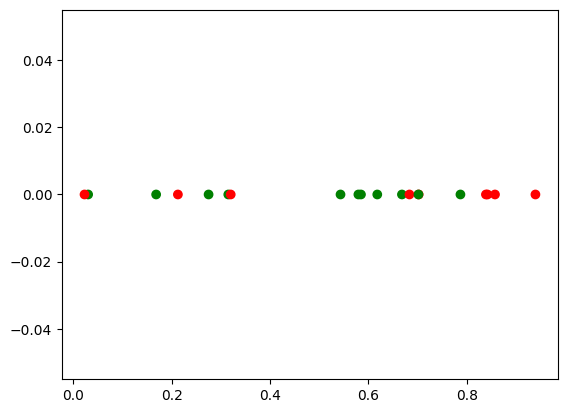

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Generate ranom data
n = 20 # number of samples
p = 0.5 # probability of class 1
X = np.random.rand(n)
y = np.random.binomial(1, p, n)

# Plot the data
plt.scatter(X, np.zeros_like(X), c=['red' if label == 1 else 'green' for label in y]);

# Use Logistic Regression to predict the probability of y given X
lr = LogisticRegression()
lr.fit(X.reshape(-1, 1), y)
y_pred = lr.predict_proba(X.reshape(-1, 1))[:, 1]

# Calculate log loss using pre-built function
loss = log_loss(y, y_pred)

# Calculate log loss manually
manual_loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).item()

print(f"Log Loss (Function): {loss:.4f}")
print(f"Log Loss (Manual): {manual_loss:.4f}")

# Check if the two methods give the same result
print(f"Log Loss = Manually Calculated Log Loss: {loss == manual_loss}")